# Problem 2: Simulated Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1(a) Mixture Normal Distribution - Impact of Heterogeneity

In [3]:
base_sample = np.random.normal(10, 1, 100)

m_values = range(10, 201, 20)

results = []

for m in m_values:
    additional_sample = np.random.normal(20, 2, m)
    combined_sample = np.concatenate([base_sample, additional_sample])
    
    results.append({
        'm': m,
        'n_total': len(combined_sample),
        'mean': np.mean(combined_sample),
        'median': np.median(combined_sample),
        'variance': np.var(combined_sample, ddof=1)
    })

results_df = pd.DataFrame(results)

print("IMPACT OF HETEROGENEITY ON STATISTICAL MEASURES:")
print(results_df.to_string(index=False))

IMPACT OF HETEROGENEITY ON STATISTICAL MEASURES:
  m  n_total      mean    median  variance
 10      110 10.996137 10.311209  9.329634
 30      130 12.509375 10.558200 21.416452
 50      150 13.304234 10.929544 22.645689
 70      170 14.141310 11.188250 25.578176
 90      190 14.970003 12.001203 28.786257
110      210 15.426410 16.644534 28.748967
130      230 15.749677 17.974447 27.403228
150      250 16.049426 18.181455 26.256377
170      270 16.388453 18.579919 26.217950
190      290 16.517255 18.542562 24.644934


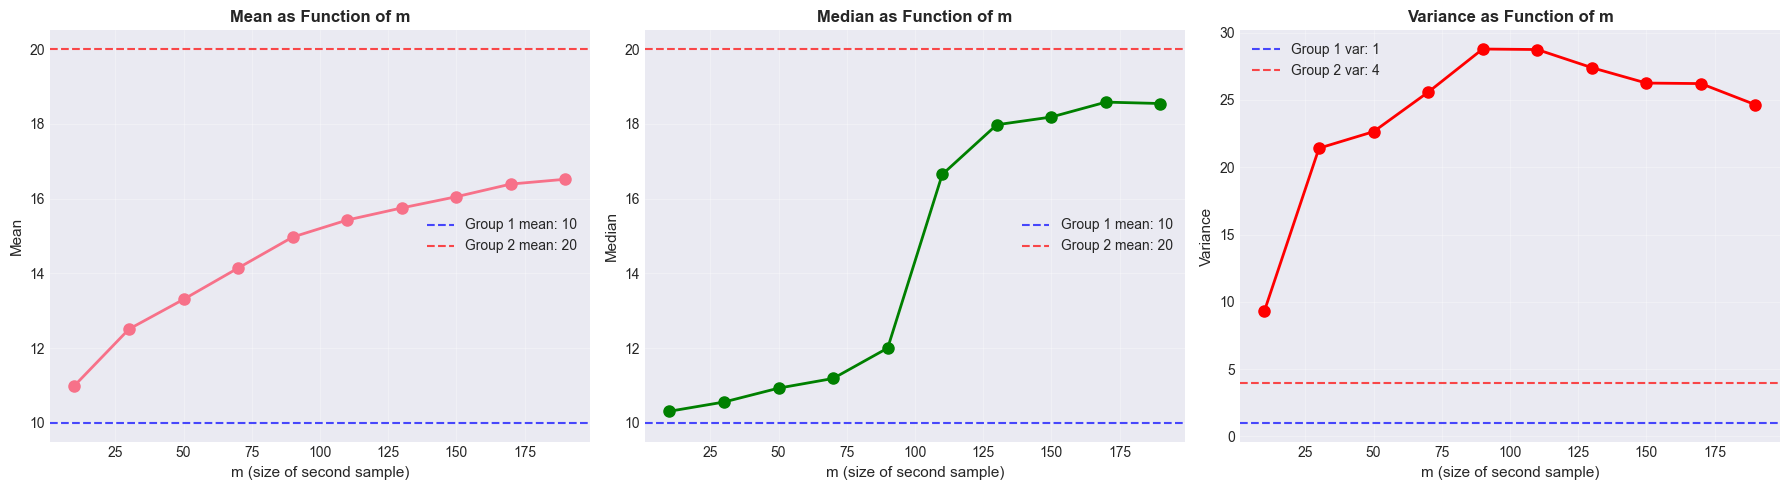

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(results_df['m'], results_df['mean'], 'o-', linewidth=2, markersize=8)
axes[0].axhline(y=10, color='blue', linestyle='--', alpha=0.7, label='Group 1 mean: 10')
axes[0].axhline(y=20, color='red', linestyle='--', alpha=0.7, label='Group 2 mean: 20')
axes[0].set_xlabel('m (size of second sample)', fontsize=11)
axes[0].set_ylabel('Mean', fontsize=11)
axes[0].set_title('Mean as Function of m', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(results_df['m'], results_df['median'], 'o-', linewidth=2, markersize=8, color='green')
axes[1].axhline(y=10, color='blue', linestyle='--', alpha=0.7, label='Group 1 mean: 10')
axes[1].axhline(y=20, color='red', linestyle='--', alpha=0.7, label='Group 2 mean: 20')
axes[1].set_xlabel('m (size of second sample)', fontsize=11)
axes[1].set_ylabel('Median', fontsize=11)
axes[1].set_title('Median as Function of m', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(results_df['m'], results_df['variance'], 'o-', linewidth=2, markersize=8, color='red')
axes[2].axhline(y=1, color='blue', linestyle='--', alpha=0.7, label='Group 1 var: 1')
axes[2].axhline(y=4, color='red', linestyle='--', alpha=0.7, label='Group 2 var: 4')
axes[2].set_xlabel('m (size of second sample)', fontsize=11)
axes[2].set_ylabel('Variance', fontsize=11)
axes[2].set_title('Variance as Function of m', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Discussion:

**Impact of Heterogeneity:**

**Mean:**
- Starts at 10 (when m is small, dominated by first group)
- Increases linearly toward 20 as m grows
- Sensitive to sample size - weighted average of the two means

**Median:**
- More resistant to the contamination initially
- Shows step-like behavior rather than smooth transition
- Jumps from 10 to 20 when second group becomes majority
- Demonstrates robustness property of median

**Variance:**
- Increases dramatically as heterogeneity increases
- Much larger than either component variance (1 or 4)
- Captures between-group variability, not just within-group
- Peak variance occurs when groups are balanced in size
- Shows that mixing populations inflates variance estimate

## 1(b) Visual Comparison for Different m Values

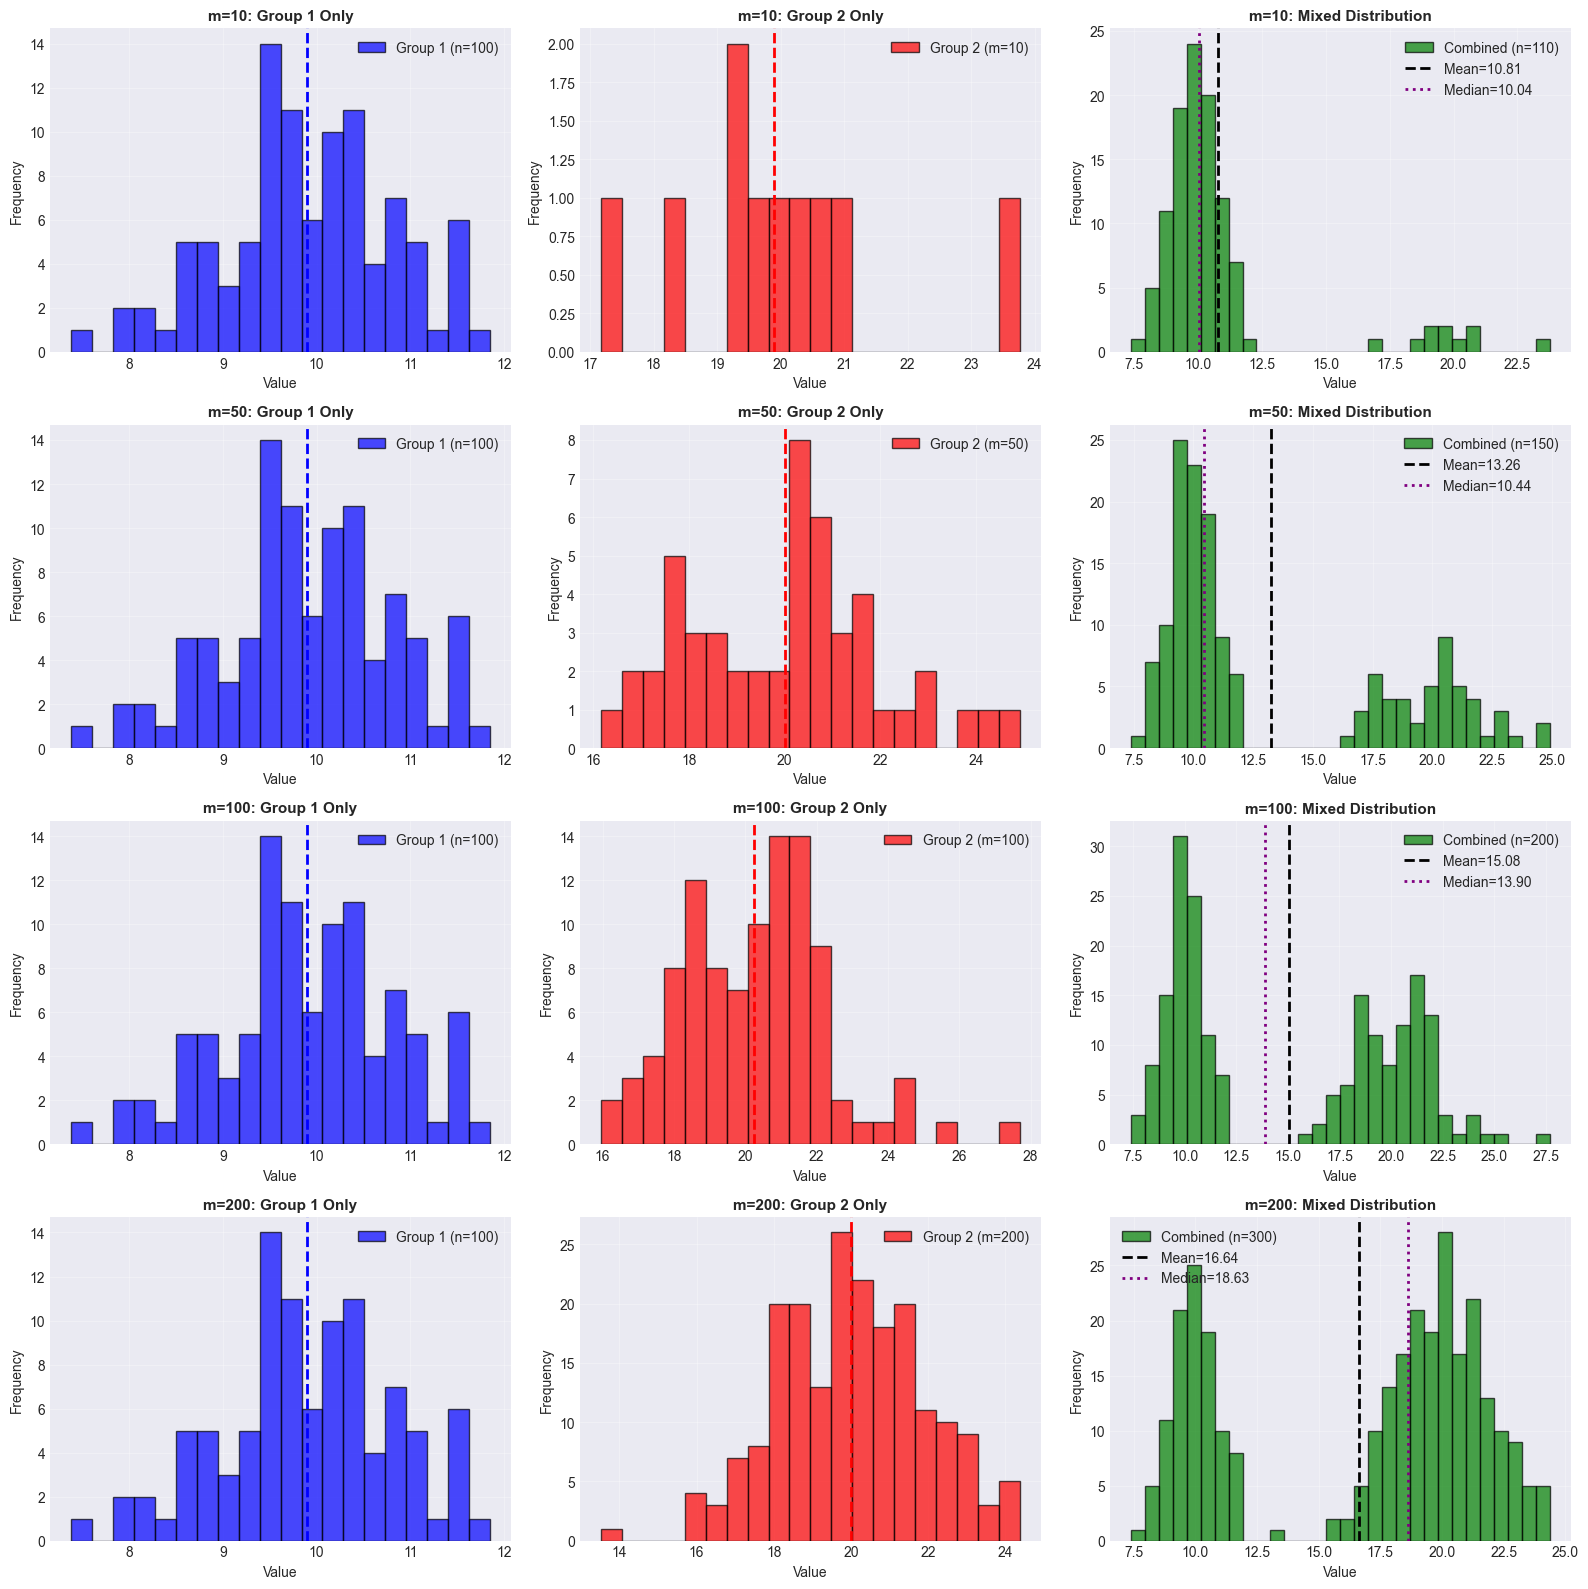

In [6]:
np.random.seed(42)
base_sample = np.random.normal(10, 1, 100)

m_selected = [10, 50, 100, 200]

fig, axes = plt.subplots(len(m_selected), 3, figsize=(16, 4*len(m_selected)))

for idx, m in enumerate(m_selected):
    additional_sample = np.random.normal(20, 2, m)
    combined_sample = np.concatenate([base_sample, additional_sample])
    
    axes[idx, 0].hist(base_sample, bins=20, alpha=0.7, label='Group 1 (n=100)', edgecolor='black', color='blue')
    axes[idx, 0].axvline(base_sample.mean(), color='blue', linestyle='--', linewidth=2)
    axes[idx, 0].set_title(f'm={m}: Group 1 Only', fontsize=11, fontweight='bold')
    axes[idx, 0].set_xlabel('Value')
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    axes[idx, 1].hist(additional_sample, bins=20, alpha=0.7, label=f'Group 2 (m={m})', edgecolor='black', color='red')
    axes[idx, 1].axvline(additional_sample.mean(), color='red', linestyle='--', linewidth=2)
    axes[idx, 1].set_title(f'm={m}: Group 2 Only', fontsize=11, fontweight='bold')
    axes[idx, 1].set_xlabel('Value')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].legend()
    axes[idx, 1].grid(True, alpha=0.3)
    
    axes[idx, 2].hist(combined_sample, bins=30, alpha=0.7, label=f'Combined (n={100+m})', edgecolor='black', color='green')
    axes[idx, 2].axvline(combined_sample.mean(), color='black', linestyle='--', linewidth=2, label=f'Mean={combined_sample.mean():.2f}')
    axes[idx, 2].axvline(np.median(combined_sample), color='purple', linestyle=':', linewidth=2, label=f'Median={np.median(combined_sample):.2f}')
    axes[idx, 2].set_title(f'm={m}: Mixed Distribution', fontsize=11, fontweight='bold')
    axes[idx, 2].set_xlabel('Value')
    axes[idx, 2].set_ylabel('Frequency')
    axes[idx, 2].legend()
    axes[idx, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

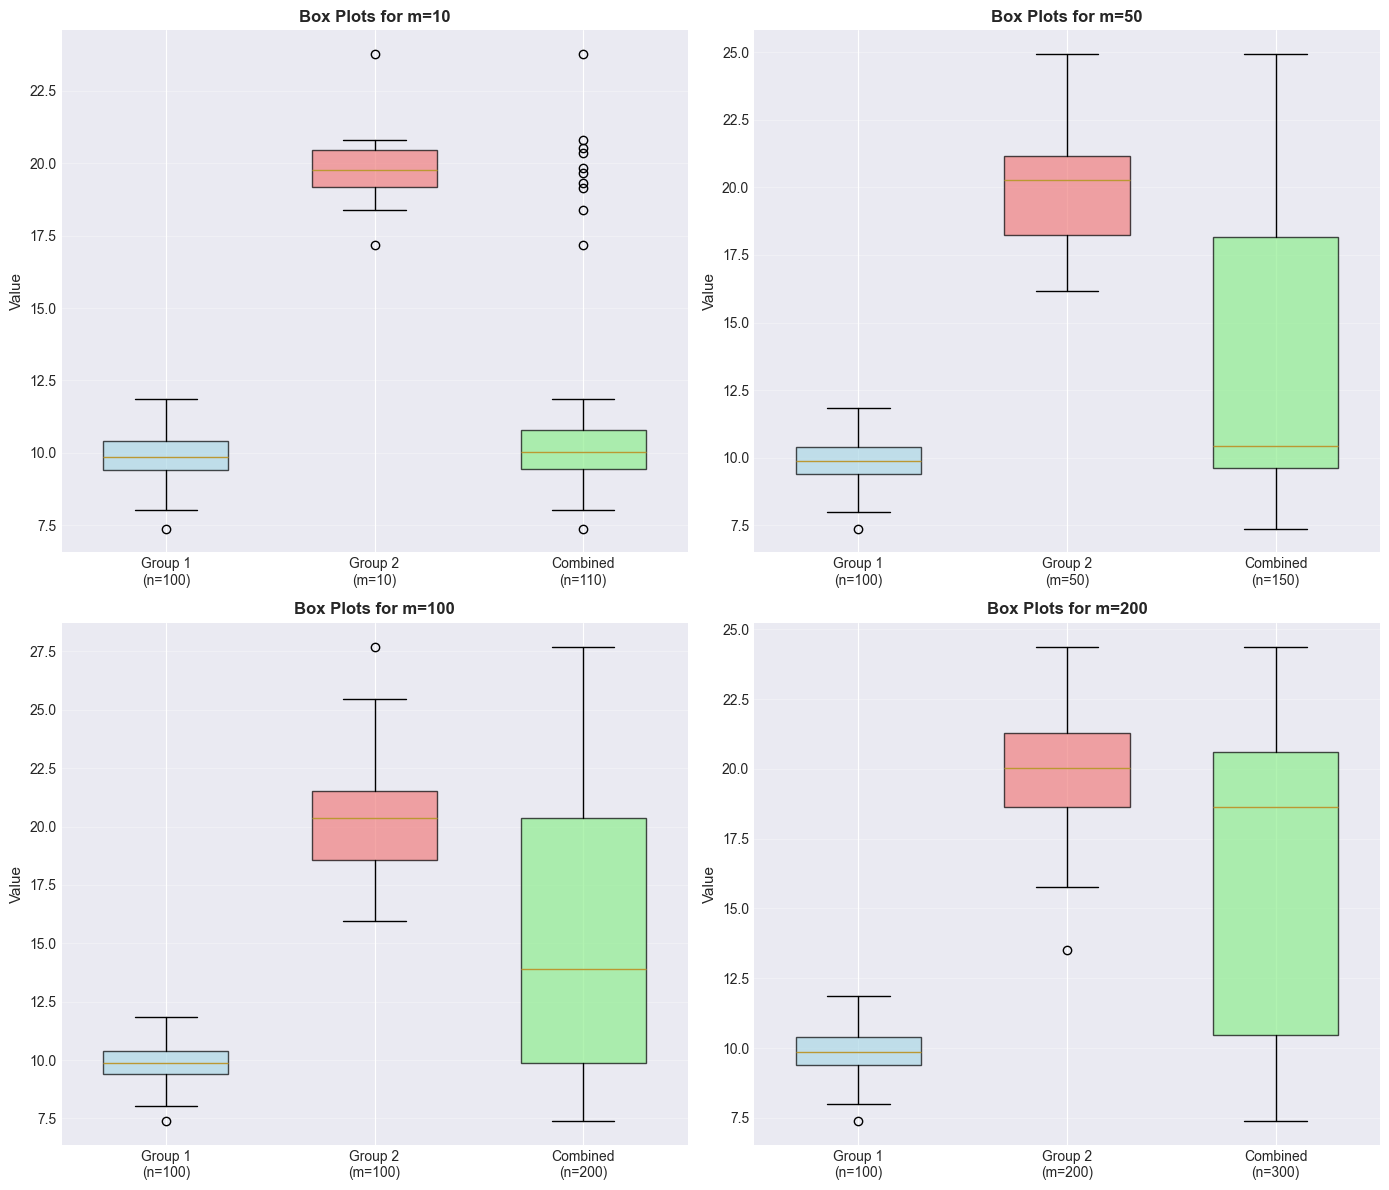

In [7]:
np.random.seed(42)
base_sample = np.random.normal(10, 1, 100)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, m in enumerate(m_selected):
    additional_sample = np.random.normal(20, 2, m)
    combined_sample = np.concatenate([base_sample, additional_sample])
    
    data_for_boxplot = [base_sample, additional_sample, combined_sample]
    
    bp = axes[idx].boxplot(data_for_boxplot, labels=['Group 1\n(n=100)', f'Group 2\n(m={m})', f'Combined\n(n={100+m})'],
                           patch_artist=True, widths=0.6)
    
    colors = ['lightblue', 'lightcoral', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'Box Plots for m={m}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 2(a) Mathematical Proof: Correlation Structure

**Given:** $U \sim N(0,1)$, $V \sim N(0,1)$ independent  

**Define:** $U^* = U$ and $V^* = \rho U + \sqrt{1-\rho^2}V$

**Prove:** $\text{Corr}(U^*, V^*) = \rho$ and $\text{Var}(U^*) = \text{Var}(V^*) = 1$

---

### Proof:

**Part 1: Variance of $U^*$**

$$\text{Var}(U^*) = \text{Var}(U) = 1 \quad \checkmark$$

---

**Part 2: Variance of $V^*$**

$$V^* = \rho U + \sqrt{1-\rho^2}V$$

$$
\begin{align*}
\text{Var}(V^*) &= \text{Var}(\rho U + \sqrt{1-\rho^2}V) \\
&= \text{Var}(\rho U) + \text{Var}(\sqrt{1-\rho^2}V) \quad \text{[U,V independent]} \\
&= \rho^2 \cdot \text{Var}(U) + (1-\rho^2) \cdot \text{Var}(V) \\
&= \rho^2 \cdot 1 + (1-\rho^2) \cdot 1 \\
&= \rho^2 + 1 - \rho^2 \\
&= 1 \quad \checkmark
\end{align*}
$$

---

**Part 3: Covariance of $U^*$ and $V^*$**

$$
\begin{align*}
\text{Cov}(U^*, V^*) &= \text{Cov}(U, \rho U + \sqrt{1-\rho^2}V) \\
&= \text{Cov}(U, \rho U) + \text{Cov}(U, \sqrt{1-\rho^2}V) \\
&= \rho \cdot \text{Cov}(U, U) + \sqrt{1-\rho^2} \cdot \text{Cov}(U, V) \\
&= \rho \cdot \text{Var}(U) + \sqrt{1-\rho^2} \cdot 0 \quad \text{[U,V independent} \Rightarrow \text{Cov}=0] \\
&= \rho \cdot 1 + 0 \\
&= \rho
\end{align*}
$$

---

**Part 4: Correlation**

$$
\begin{align*}
\text{Corr}(U^*, V^*) &= \frac{\text{Cov}(U^*, V^*)}{\sqrt{\text{Var}(U^*) \cdot \text{Var}(V^*)}} \\
&= \frac{\rho}{\sqrt{1 \cdot 1}} \\
&= \rho \quad \checkmark
\end{align*}
$$

## 2(b) Simulation: Pearson vs Spearman for Different $\rho$

In [10]:
np.random.seed(42)

rho_values = np.linspace(-0.9, 0.9, 19)
n = 100
n_simulations = 100

results_correlations = []

for rho in rho_values:
    pearson_corrs = []
    spearman_corrs = []
    
    for _ in range(n_simulations):
        U = np.random.normal(0, 1, n)
        V = np.random.normal(0, 1, n)
        
        U_star = U
        V_star = rho * U + np.sqrt(1 - rho**2) * V
        
        pearson_corr = np.corrcoef(U_star, V_star)[0, 1]
        spearman_corr = stats.spearmanr(U_star, V_star)[0]
        
        pearson_corrs.append(pearson_corr)
        spearman_corrs.append(spearman_corr)
    
    results_correlations.append({
        'rho': rho,
        'pearson_mean': np.mean(pearson_corrs),
        'pearson_std': np.std(pearson_corrs),
        'spearman_mean': np.mean(spearman_corrs),
        'spearman_std': np.std(spearman_corrs)
    })

corr_df = pd.DataFrame(results_correlations)

print(corr_df.round(4).to_string(index=False))

 rho  pearson_mean  pearson_std  spearman_mean  spearman_std
-0.9       -0.8983       0.0207        -0.8835        0.0250
-0.8       -0.7950       0.0370        -0.7797        0.0413
-0.7       -0.6891       0.0616        -0.6688        0.0701
-0.6       -0.5904       0.0724        -0.5672        0.0786
-0.5       -0.4986       0.0837        -0.4810        0.0923
-0.4       -0.3968       0.0846        -0.3842        0.0888
-0.3       -0.2890       0.0959        -0.2806        0.0933
-0.2       -0.1963       0.1036        -0.1817        0.1067
-0.1       -0.1073       0.1047        -0.1054        0.1026
 0.0       -0.0016       0.0979         0.0005        0.0997
 0.1        0.1023       0.1080         0.1024        0.1060
 0.2        0.2035       0.0946         0.1931        0.0893
 0.3        0.3003       0.0870         0.2886        0.0921
 0.4        0.3901       0.0891         0.3664        0.0940
 0.5        0.5005       0.0829         0.4799        0.0888
 0.6        0.5895      

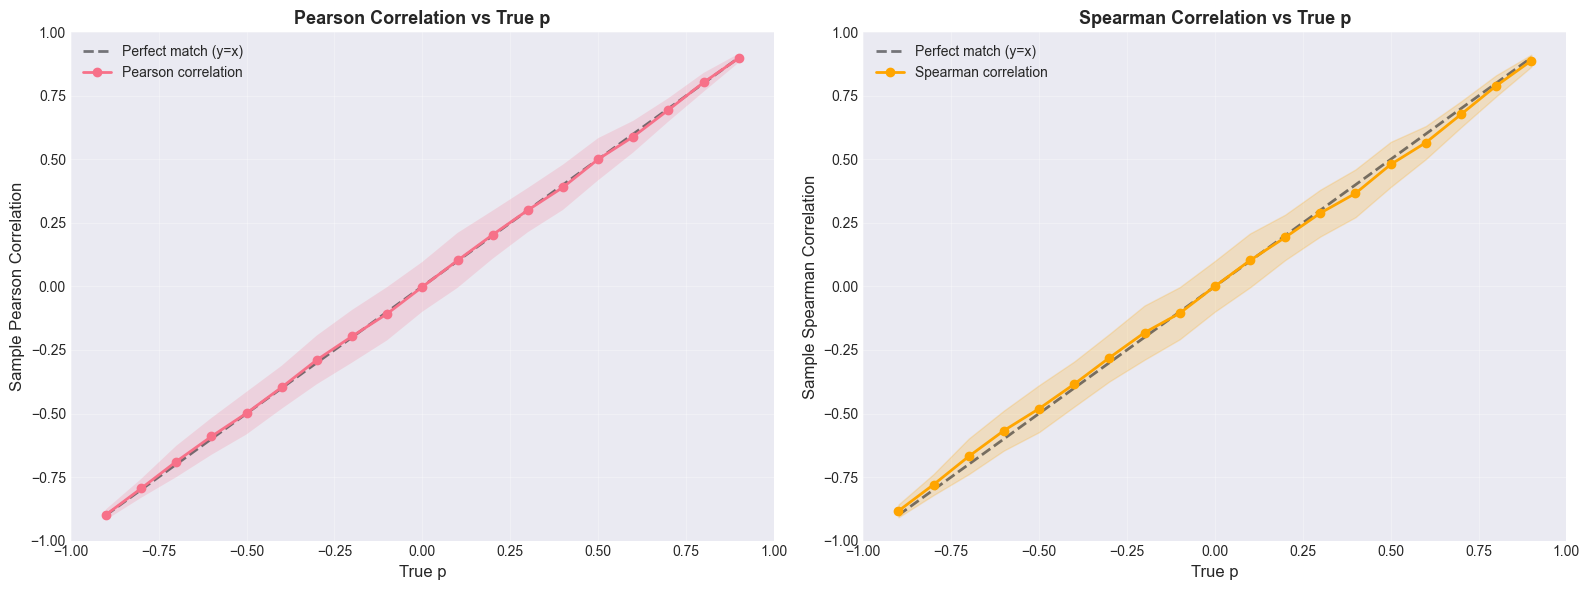

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(corr_df['rho'], corr_df['rho'], 'k--', linewidth=2, label='Perfect match (y=x)', alpha=0.5)
axes[0].plot(corr_df['rho'], corr_df['pearson_mean'], 'o-', linewidth=2, markersize=6, label='Pearson correlation')
axes[0].fill_between(corr_df['rho'], 
                      corr_df['pearson_mean'] - corr_df['pearson_std'],
                      corr_df['pearson_mean'] + corr_df['pearson_std'],
                      alpha=0.2)
axes[0].set_xlabel('True p', fontsize=12)
axes[0].set_ylabel('Sample Pearson Correlation', fontsize=12)
axes[0].set_title('Pearson Correlation vs True p', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)

axes[1].plot(corr_df['rho'], corr_df['rho'], 'k--', linewidth=2, label='Perfect match (y=x)', alpha=0.5)
axes[1].plot(corr_df['rho'], corr_df['spearman_mean'], 'o-', linewidth=2, markersize=6, label='Spearman correlation', color='orange')
axes[1].fill_between(corr_df['rho'], 
                      corr_df['spearman_mean'] - corr_df['spearman_std'],
                      corr_df['spearman_mean'] + corr_df['spearman_std'],
                      alpha=0.2, color='orange')
axes[1].set_xlabel('True p', fontsize=12)
axes[1].set_ylabel('Sample Spearman Correlation', fontsize=12)
axes[1].set_title('Spearman Correlation vs True p', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(-1, 1)

plt.tight_layout()
plt.show()

## 2(c) Non-linear Transformation: Impact on Correlations

In [17]:
np.random.seed(42)

rho_values = np.linspace(-0.9, 0.9, 19)
n = 100
n_simulations = 100

results_transformed = []

for rho in rho_values:
    pearson_original = []
    spearman_original = []
    pearson_transformed = []
    spearman_transformed = []
    
    for _ in range(n_simulations):
        U = np.random.normal(0, 1, n)
        V = np.random.normal(0, 1, n)
        
        U_star = U
        V_star = rho * U + np.sqrt(1 - rho**2) * V
        
        V_star_exp = np.exp(V_star)
        
        pearson_original.append(np.corrcoef(U_star, V_star)[0, 1])
        spearman_original.append(stats.spearmanr(U_star, V_star)[0])
        pearson_transformed.append(np.corrcoef(U_star, V_star_exp)[0, 1])
        spearman_transformed.append(stats.spearmanr(U_star, V_star_exp)[0])
    
    results_transformed.append({
        'rho': rho,
        'pearson_original': np.mean(pearson_original),
        'spearman_original': np.mean(spearman_original),
        'pearson_transformed': np.mean(pearson_transformed),
        'spearman_transformed': np.mean(spearman_transformed)
    })

transform_df = pd.DataFrame(results_transformed)

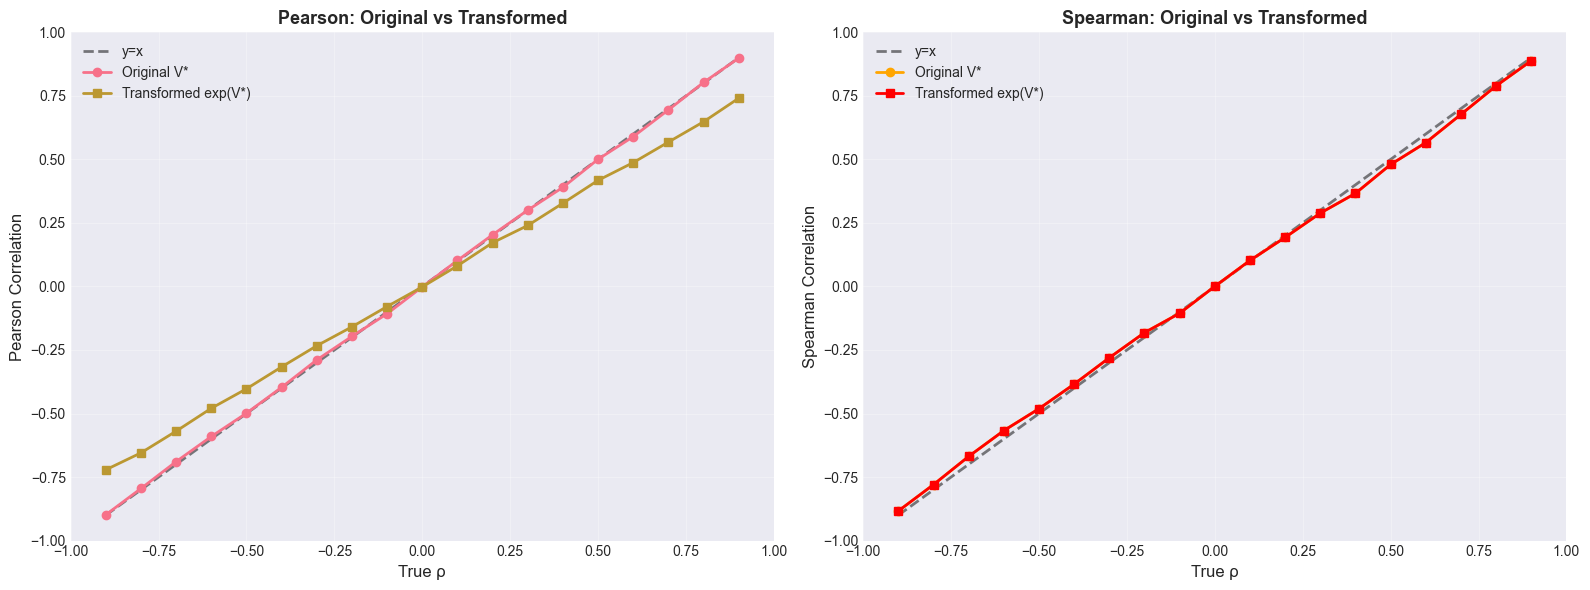

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(transform_df['rho'], transform_df['rho'], 'k--', linewidth=2, label='y=x', alpha=0.5)
axes[0].plot(transform_df['rho'], transform_df['pearson_original'], 'o-', linewidth=2, 
             label='Original V*', markersize=6)
axes[0].plot(transform_df['rho'], transform_df['pearson_transformed'], 's-', linewidth=2, 
             label='Transformed exp(V*)', markersize=6)
axes[0].set_xlabel('True ρ', fontsize=12)
axes[0].set_ylabel('Pearson Correlation', fontsize=12)
axes[0].set_title('Pearson: Original vs Transformed', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)

axes[1].plot(transform_df['rho'], transform_df['rho'], 'k--', linewidth=2, label='y=x', alpha=0.5)
axes[1].plot(transform_df['rho'], transform_df['spearman_original'], 'o-', linewidth=2, 
             label='Original V*', markersize=6, color='orange')
axes[1].plot(transform_df['rho'], transform_df['spearman_transformed'], 's-', linewidth=2, 
             label='Transformed exp(V*)', markersize=6, color='red')
axes[1].set_xlabel('True ρ', fontsize=12)
axes[1].set_ylabel('Spearman Correlation', fontsize=12)
axes[1].set_title('Spearman: Original vs Transformed', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(-1, 1)

plt.tight_layout()
plt.show()

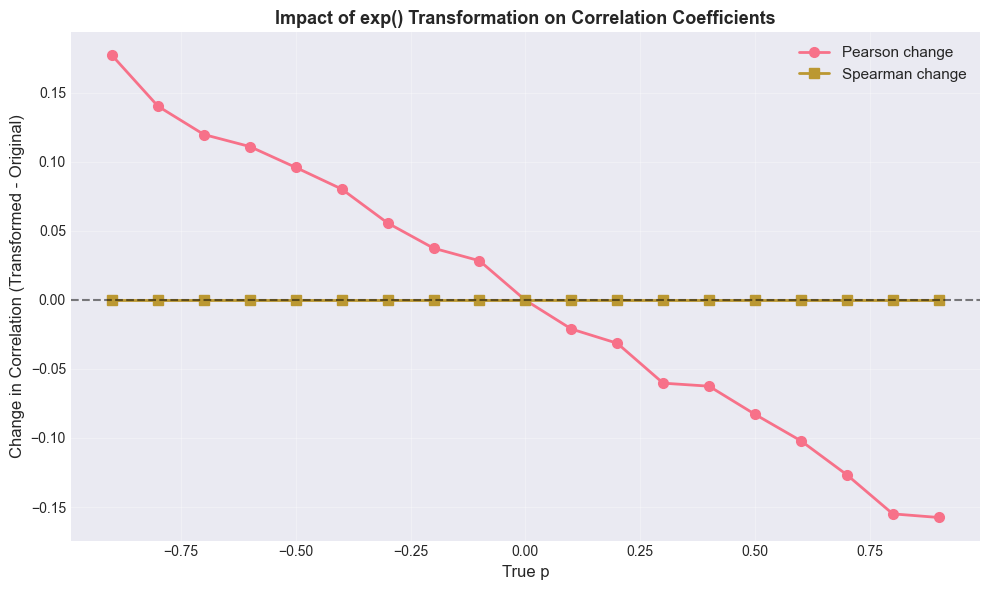

In [21]:
transform_df['pearson_change'] = transform_df['pearson_transformed'] - transform_df['pearson_original']
transform_df['spearman_change'] = transform_df['spearman_transformed'] - transform_df['spearman_original']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(transform_df['rho'], transform_df['pearson_change'], 'o-', linewidth=2, 
        label='Pearson change', markersize=7)
ax.plot(transform_df['rho'], transform_df['spearman_change'], 's-', linewidth=2, 
        label='Spearman change', markersize=7)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

ax.set_xlabel('True p', fontsize=12)
ax.set_ylabel('Change in Correlation (Transformed - Original)', fontsize=12)
ax.set_title('Impact of exp() Transformation on Correlation Coefficients', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Effect of Exponential Transformation:**

1. **Pearson Correlation:**
   - **Dramatically affected** by the non-linear transformation
   - The relationship becomes non-linear (curved), so Pearson underestimates association
   - For positive $\rho$: transformed Pearson < original Pearson
   - For negative $\rho$: similar reduction in absolute value

2. **Spearman Correlation:**
   - **Remains nearly unchanged** after transformation
   - Since exp() is monotonic increasing, it preserves ranks
   - Spearman measures monotonic relationships, so unaffected by monotonic transformations
   - Lines overlap almost perfectly in the plot